***Vanilla GAN***

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

In [2]:
import tensorflow as tf

from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.layers import Dense, Reshape, Flatten, Activation, LeakyReLU, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.utils import plot_model

In [3]:
from tensorflow.keras.datasets.mnist import load_data

(train_X, train_y), (test_X, test_y) = load_data()
print("Before Re-shaping: ",train_X.shape)

train_X = train_X.reshape(train_X.shape[0],28*28).astype('float32')

train_X = (train_X/255 - 0.5) * 2

print("After  Re-shaping: ",train_X.shape)

11501568/11490434 [==============================] - 0s 0us/step
Before Re-shaping:  (60000, 28, 28)
After  Re-shaping:  (60000, 784)


In [4]:
# Generator

noise_dim = 100

img_dim = 784

init = RandomNormal(stddev=0.02)

gen = Sequential()

gen.add(Dense(128, input_shape = (noise_dim,), kernel_initializer = init))
gen.add(LeakyReLU(alpha = 0.2))
gen.add(BatchNormalization(momentum = 0.8))

gen.add(Dense(256))
gen.add(LeakyReLU(alpha = 0.2))
gen.add(BatchNormalization(momentum = 0.8))

gen.add(Dense(512))
gen.add(LeakyReLU(alpha = 0.2))
gen.add(BatchNormalization(momentum = 0.8))

gen.add(Dense(img_dim, activation = 'tanh'))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               12928     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128)               0         
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 256)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                        

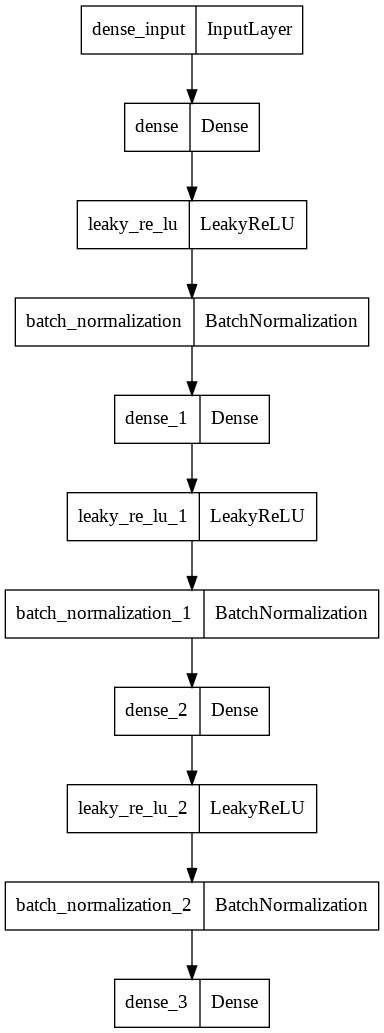

In [5]:
gen.summary()

plot_model(gen)

In [6]:
# discriminator

disc = Sequential()

disc.add(Dense(128, input_shape = (img_dim,), kernel_initializer = init ))
disc.add(LeakyReLU(alpha = 0.2))

disc.add(Dense(256))
disc.add(LeakyReLU(alpha = 0.2))

disc.add(Dense(512))
disc.add(LeakyReLU(alpha = 0.2))

disc.add(Dense(1, activation='sigmoid'))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               33024     
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 512)               131584    
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                

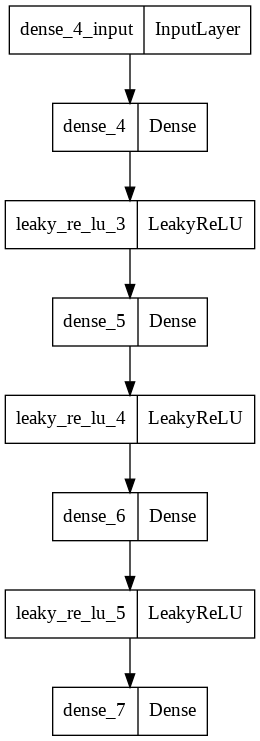

In [7]:
disc.summary()

plot_model(disc)

In [8]:
optimizer = Adam(learning_rate = 0.0002, beta_1= 0.5)

disc.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['binary_accuracy'])

In [9]:
disc.trainable = False

dg = Sequential()

dg.add(gen)
dg.add(disc)

dg.compile(optimizer = optimizer, loss = "binary_crossentropy", metrics = ["binary_accuracy"])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 784)               583312    
                                                                 
 sequential_1 (Sequential)   (None, 1)                 265601    
                                                                 
Total params: 848,913
Trainable params: 581,520
Non-trainable params: 267,393
_________________________________________________________________


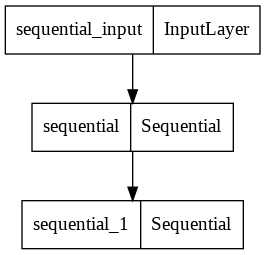

In [10]:
dg.summary()

plot_model(dg)

epoch = 1/100, d_loss=0.685, g_loss=1.881                                                                                                     


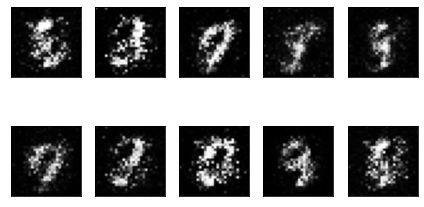

epoch = 2/100, d_loss=0.515, g_loss=1.816                                                                                                     
epoch = 3/100, d_loss=0.577, g_loss=1.583                                                                                                     
epoch = 4/100, d_loss=0.525, g_loss=1.299                                                                                                     
epoch = 5/100, d_loss=0.562, g_loss=1.512                                                                                                     
epoch = 6/100, d_loss=0.589, g_loss=1.184                                                                                                     
epoch = 7/100, d_loss=0.640, g_loss=1.138                                                                                                     
epoch = 8/100, d_loss=0.561, g_loss=1.163                                                                                                     

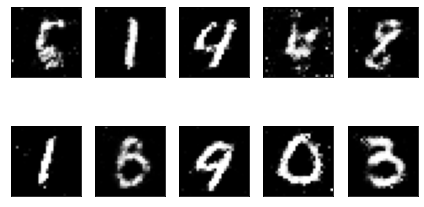

epoch = 12/100, d_loss=0.611, g_loss=1.048                                                                                                     
epoch = 13/100, d_loss=0.637, g_loss=1.057                                                                                                     
epoch = 14/100, d_loss=0.593, g_loss=1.108                                                                                                     
epoch = 15/100, d_loss=0.625, g_loss=1.075                                                                                                     
epoch = 16/100, d_loss=0.602, g_loss=1.126                                                                                                     
epoch = 17/100, d_loss=0.642, g_loss=1.071                                                                                                     
epoch = 18/100, d_loss=0.612, g_loss=1.074                                                                                              

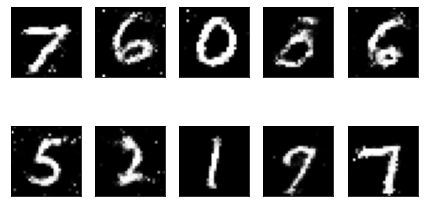

epoch = 22/100, d_loss=0.624, g_loss=1.156                                                                                                     
epoch = 23/100, d_loss=0.620, g_loss=1.106                                                                                                     
epoch = 24/100, d_loss=0.601, g_loss=1.134                                                                                                     
epoch = 25/100, d_loss=0.600, g_loss=1.119                                                                                                     
epoch = 26/100, d_loss=0.590, g_loss=1.184                                                                                                     
epoch = 27/100, d_loss=0.592, g_loss=1.148                                                                                                     
epoch = 28/100, d_loss=0.583, g_loss=1.083                                                                                              

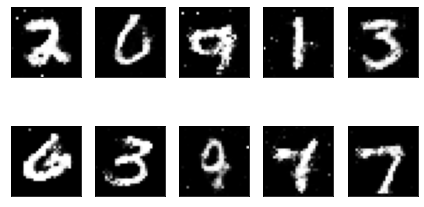

epoch = 32/100, d_loss=0.556, g_loss=1.146                                                                                                     
epoch = 33/100, d_loss=0.576, g_loss=1.095                                                                                                     
epoch = 34/100, d_loss=0.590, g_loss=1.145                                                                                                     
epoch = 35/100, d_loss=0.590, g_loss=1.224                                                                                                     
epoch = 36/100, d_loss=0.614, g_loss=1.086                                                                                                     
epoch = 37/100, d_loss=0.568, g_loss=1.212                                                                                                     
epoch = 38/100, d_loss=0.659, g_loss=1.211                                                                                              

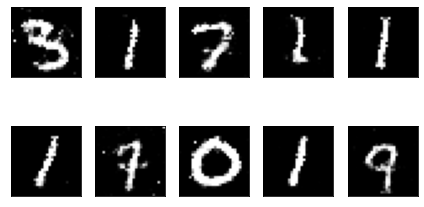

epoch = 42/100, d_loss=0.552, g_loss=1.220                                                                                                     
epoch = 43/100, d_loss=0.605, g_loss=1.196                                                                                                     
epoch = 44/100, d_loss=0.553, g_loss=1.261                                                                                                     
epoch = 45/100, d_loss=0.632, g_loss=1.193                                                                                                     
epoch = 46/100, d_loss=0.556, g_loss=1.151                                                                                                     
epoch = 47/100, d_loss=0.530, g_loss=1.255                                                                                                     
epoch = 48/100, d_loss=0.562, g_loss=1.216                                                                                              

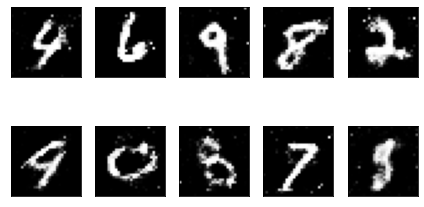

epoch = 52/100, d_loss=0.582, g_loss=1.279                                                                                                     
epoch = 53/100, d_loss=0.566, g_loss=1.280                                                                                                     
epoch = 54/100, d_loss=0.565, g_loss=1.253                                                                                                     
epoch = 55/100, d_loss=0.528, g_loss=1.222                                                                                                     
epoch = 56/100, d_loss=0.553, g_loss=1.327                                                                                                     
epoch = 57/100, d_loss=0.613, g_loss=1.262                                                                                                     
epoch = 58/100, d_loss=0.563, g_loss=1.299                                                                                              

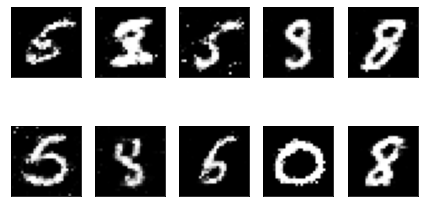

epoch = 62/100, d_loss=0.536, g_loss=1.320                                                                                                     
epoch = 63/100, d_loss=0.592, g_loss=1.223                                                                                                     
epoch = 64/100, d_loss=0.571, g_loss=1.188                                                                                                     
epoch = 65/100, d_loss=0.603, g_loss=1.183                                                                                                     
epoch = 66/100, d_loss=0.536, g_loss=1.333                                                                                                     
epoch = 67/100, d_loss=0.579, g_loss=1.165                                                                                                     
epoch = 68/100, d_loss=0.594, g_loss=1.315                                                                                              

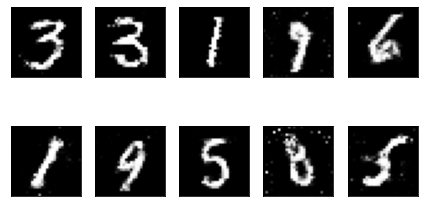

epoch = 72/100, d_loss=0.560, g_loss=1.262                                                                                                     
epoch = 73/100, d_loss=0.531, g_loss=1.436                                                                                                     
epoch = 74/100, d_loss=0.543, g_loss=1.391                                                                                                     
epoch = 75/100, d_loss=0.539, g_loss=1.366                                                                                                     
epoch = 76/100, d_loss=0.544, g_loss=1.444                                                                                                     
epoch = 77/100, d_loss=0.538, g_loss=1.323                                                                                                     
epoch = 78/100, d_loss=0.524, g_loss=1.364                                                                                              

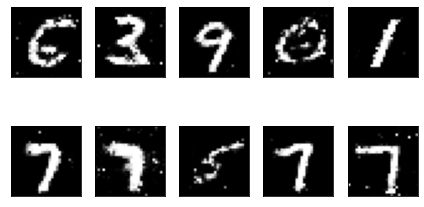

epoch = 82/100, d_loss=0.518, g_loss=1.424                                                                                                     
epoch = 83/100, d_loss=0.554, g_loss=1.449                                                                                                     
epoch = 84/100, d_loss=0.509, g_loss=1.529                                                                                                     
epoch = 85/100, d_loss=0.513, g_loss=1.468                                                                                                     
epoch = 86/100, d_loss=0.696, g_loss=1.252                                                                                                     
epoch = 87/100, d_loss=0.575, g_loss=1.516                                                                                                     
epoch = 88/100, d_loss=0.573, g_loss=1.559                                                                                              

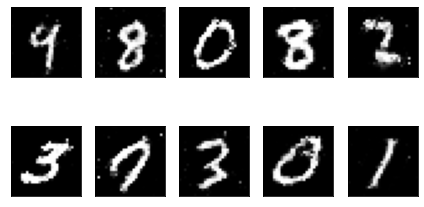

epoch = 92/100, d_loss=0.519, g_loss=1.633                                                                                                     
epoch = 93/100, d_loss=0.625, g_loss=1.296                                                                                                     
epoch = 94/100, d_loss=0.559, g_loss=1.557                                                                                                     
epoch = 95/100, d_loss=0.484, g_loss=1.582                                                                                                     
epoch = 96/100, d_loss=0.526, g_loss=1.449                                                                                                     
epoch = 97/100, d_loss=0.533, g_loss=1.541                                                                                                     
epoch = 98/100, d_loss=0.558, g_loss=1.407                                                                                              

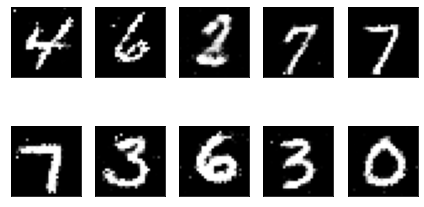

In [12]:
epochs = 100
batch_size = 64
smooth = 0.1

real = np.ones(shape = (batch_size,1))
fake = np.zeros(shape = (batch_size,1))

d_loss = []
dg_loss = []

for e in range(epochs + 1):
  for i in range((len(train_X) // batch_size)):

    disc.trainable = True

    X_batch = train_X[i * batch_size : (i + 1) * batch_size]
    d_loss_real = disc.train_on_batch(
            x=X_batch, y=real * (1 - smooth)
        )
    
    z = np.random.normal(loc=0, scale=1, size=(batch_size, noise_dim))
    X_fake = gen.predict_on_batch(z)
    d_loss_fake = disc.train_on_batch(x=X_fake, y=fake)

    d_loss_batch = 0.5 * (d_loss_real[0] + d_loss_fake[0])

    disc.trainable = False
    dg_loss_batch = dg.train_on_batch(x=z, y=real)

    print(
            "epoch = %d/%d, batch = %d/%d, d_loss=%.3f, g_loss=%.3f"
            % (
                e + 1,
                epochs,
                i,
                len(train_X) // batch_size,
                d_loss_batch,
                dg_loss_batch[0],
              ),
            100 * " ",
            end="\r",
          )
    
  d_loss.append(d_loss_batch)
  dg_loss.append(dg_loss_batch[0])

  print(
        "epoch = %d/%d, d_loss=%.3f, g_loss=%.3f"
        % (e + 1, epochs, d_loss[-1], dg_loss[-1]),
        100 * " ",
        )
     
  if e % 10 == 0:
    samples = 10
    x_fake = gen.predict(
    np.random.normal(loc=0, scale=1, size=(samples, noise_dim))
                                  )

    for k in range(samples):
      plt.subplot(2, 5, k + 1)
      plt.imshow(x_fake[k].reshape(28, 28), cmap="gray")
      plt.xticks([])
      plt.yticks([])

    plt.tight_layout()
    plt.show()

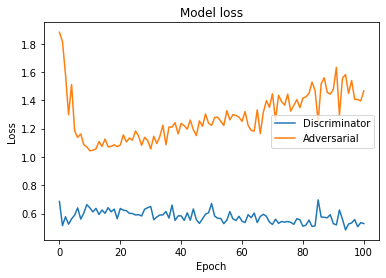

In [14]:
plt.plot(d_loss)
plt.plot(dg_loss)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Discriminator', 'Adversarial'], loc='center right')
plt.show()